In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df= pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.shape

(1338, 7)

In [10]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

There are different types of data present in the dataset.

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

So we can see that there is no null values present in the dataset.

<AxesSubplot:>

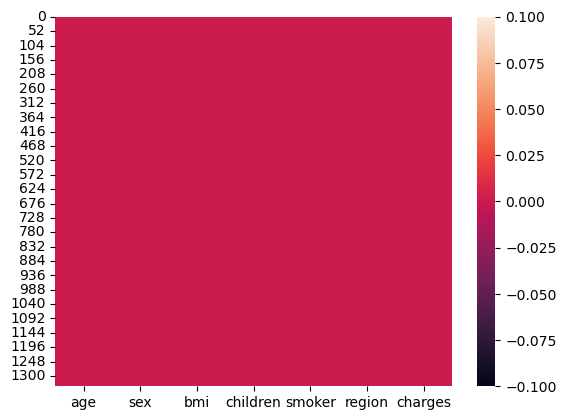

In [12]:
sns.heatmap(df.isnull())

As we know that there is no null values thats why the whole map is of same color.

In [13]:
df.set_index('age', inplace = True)

In [14]:
df

,sex,bmi,children,smoker,region,charges
age,,,,,,
19,female,27.900,0,yes,southwest,16884.92400
18,male,33.770,1,no,southeast,1725.55230
28,male,33.000,3,no,southeast,4449.46200
33,male,22.705,0,no,northwest,21984.47061
32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...
50,male,30.970,3,no,northwest,10600.54830
18,female,31.920,0,no,northeast,2205.98080
18,female,36.850,0,no,southeast,1629.83350


The set_index() function is used to set the DataFrame index using existing column

In [16]:
df.nunique().to_frame("No.of unique value")

,No.of unique value
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [20]:
#Check the value count 
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64




In [23]:
print("Total duplicate rows are", df.duplicated().sum())

Total duplicate rows are 1


In [24]:
df_no_duplicate = df.drop_duplicates()

In [25]:
df

,sex,bmi,children,smoker,region,charges
age,,,,,,
19,female,27.900,0,yes,southwest,16884.92400
18,male,33.770,1,no,southeast,1725.55230
28,male,33.000,3,no,southeast,4449.46200
33,male,22.705,0,no,northwest,21984.47061
32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...
50,male,30.970,3,no,northwest,10600.54830
18,female,31.920,0,no,northeast,2205.98080
18,female,36.850,0,no,southeast,1629.83350


In [26]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")
    

male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64




In [27]:
df.head()

,sex,bmi,children,smoker,region,charges
age,,,,,,
19,female,27.900,0,yes,southwest,16884.92400
18,male,33.770,1,no,southeast,1725.55230
28,male,33.000,3,no,southeast,4449.46200
33,male,22.705,0,no,northwest,21984.47061
32,male,28.880,0,no,northwest,3866.85520


In [28]:
df

,sex,bmi,children,smoker,region,charges
age,,,,,,
19,female,27.900,0,yes,southwest,16884.92400
18,male,33.770,1,no,southeast,1725.55230
28,male,33.000,3,no,southeast,4449.46200
33,male,22.705,0,no,northwest,21984.47061
32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...
50,male,30.970,3,no,northwest,10600.54830
18,female,31.920,0,no,northeast,2205.98080
18,female,36.850,0,no,southeast,1629.83350


Statistical Summary

In [29]:
df.describe()

,bmi,children,charges
count,1338.000000,1338.000000,1338.000000
mean,30.663397,1.094918,13270.422265
std,6.098187,1.205493,12110.011237
min,15.960000,0.000000,1121.873900
25%,26.296250,0.000000,4740.287150
50%,30.400000,1.000000,9382.033000
75%,34.693750,2.000000,16639.912515
max,53.130000,5.000000,63770.428010


There is  no negative value so we can say that ths dataset is perfect.

Count value of all the columns are same so there is no missing values.

In the charges column , the meadian value is greater than mean so we can say that there is right skewness is present.

max value is greater than 75% it means that outliers are present in the bmi and Charges 

In [34]:
dfcor= df.corr()

In [37]:
dfcor

,bmi,children,charges
bmi,1.000000,0.012759,0.198341
children,0.012759,1.000000,0.067998
charges,0.198341,0.067998,1.000000


<AxesSubplot:>

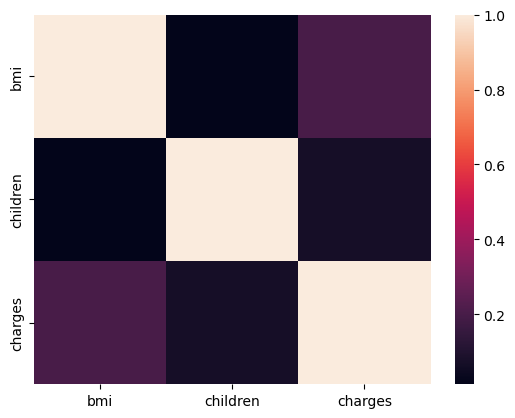

In [38]:
sns.heatmap(dfcor)

<AxesSubplot:>

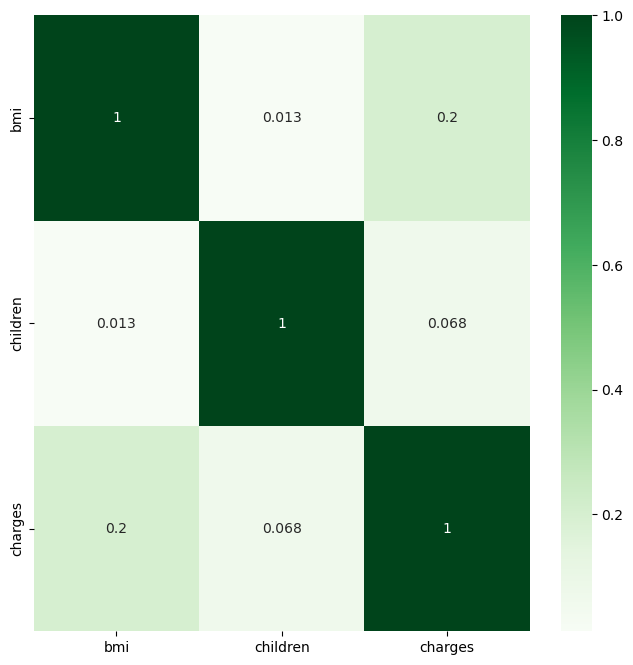

In [40]:
plt.figure(figsize=(8,8))
sns.heatmap(dfcor,cmap='Greens',annot=True)

We can easily see that there is highly correlation between bmi, charges and Children.

<AxesSubplot:>

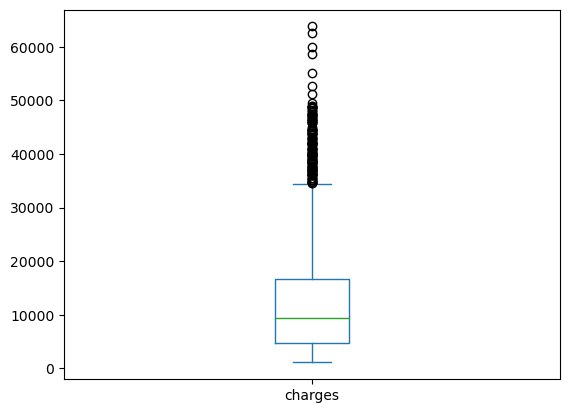

In [42]:
df['charges'].plot.box()

<AxesSubplot:>

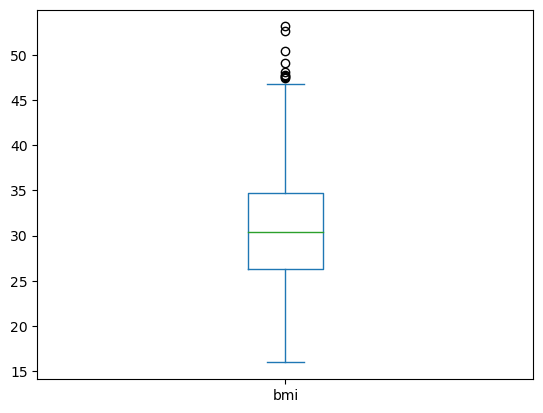

In [43]:
df['bmi'].plot.box()

<AxesSubplot:>

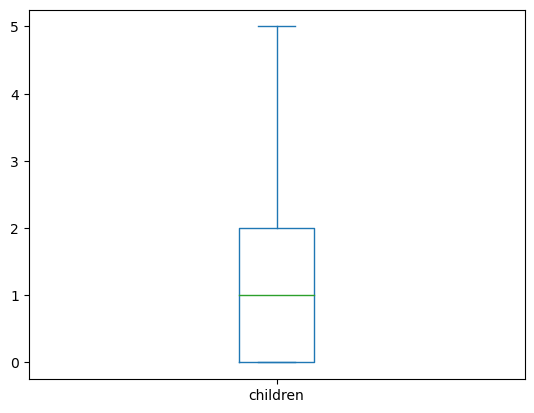

In [44]:
df['children'].plot.box()

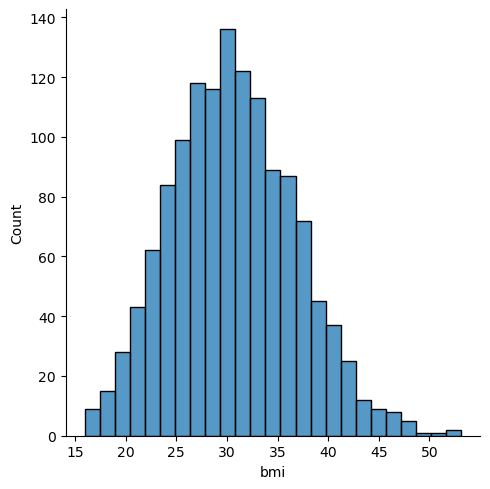

In [45]:
sns.displot(df['bmi'])

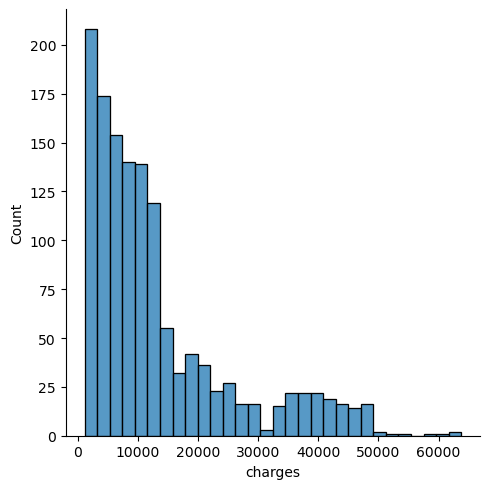

In [46]:
sns.displot(df['charges'])

In bmi there is bell shaped curve but in charges column there is right skewness is present.

In [47]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)

In [51]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 46728092.8738138
R-squared: 0.6990114352316632


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [54]:
y_pred_dt = decision_tree_model.predict(X_test)

In [55]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [57]:
print("Decision Tree - Mean Squared Error:", mse_dt)
print("Decision Tree - R-squared:", r2_dt)

Decision Tree - Mean Squared Error: 72471236.5035848
Decision Tree - R-squared: 0.5331927300969606


In [58]:
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [59]:
y_pred_rf = random_forest_model.predict(X_test)

In [60]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [61]:
print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R-squared:", r2_rf)

Random Forest - Mean Squared Error: 42213909.0573113
Random Forest - R-squared: 0.7280885411965625


In [ ]:
In the Medical cost personal insurance the best prediction is show by Random Forest.